# Yet Another MNIST Classifier

### Classifies hand written digits from the MNIST data set

In order to learn how to make an image classifier, I loosely followed this tutorial: https://nextjournal.com/gkoehler/pytorch-mnist

In [1]:

import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mnist import MNIST
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

EPOCHS = 5
LEARNING_RATE = 0.01
MOMENTUM = 0.5

In [2]:
# Load data
data = MNIST('data')
data.gz = True

train_images, train_labels = data.load_training()
test_images, test_labels = data.load_testing()

# Reformat data
for i in range(len(train_images)):
    train_images[i] = torch.tensor(train_images[i], dtype=torch.float).view(1, 1, 28, 28) / 255
    
for i in range(len(test_images)):
    test_images[i] = torch.tensor(test_images[i], dtype=torch.float).view(1, 1, 28, 28) / 255
    
train_labels = torch.tensor(train_labels).unsqueeze(1)
test_labels = torch.tensor(test_labels).unsqueeze(1)

Now that the training and testing data is set up, it's time to make sure it is correct.

Label: 3


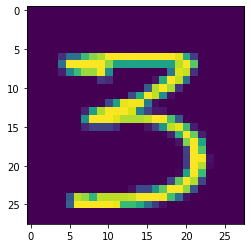

In [9]:
print('Label:', train_labels[0].item())
img = plt.imshow(train_images[0][0, 0])

The data looks good, so let's make the neural network!

In [4]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        y = F.log_softmax(x, dim=1)
        return y

In [5]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

In [6]:
network.train()
for epoch in range(1, EPOCHS + 1):
    total_loss = 0
    for i, (x, t) in enumerate(zip(train_images, train_labels)):
        optimizer.zero_grad()
        y = network(x)
        loss = F.nll_loss(y, t)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        print(f'Epoch: {epoch:{len(str(EPOCHS))}d}/{EPOCHS} Loss: {total_loss / i:.2f} Item: {i+1}/{len(train_images)}', end='\r')
    print()
    
    # Shuffle the data
    data = list(zip(train_images, train_labels))
    random.shuffle(data)
    train_images, train_labels = list(zip(*data))

Epoch: 1/5 Loss: 1.32 Item: 59999/60000
Epoch: 2/5 Loss: 1.53 Item: 59999/60000
Epoch: 3/5 Loss: 2.13 Item: 59999/60000
Epoch: 4/5 Loss: 2.31 Item: 59999/60000
Epoch: 5/5 Loss: 2.31 Item: 59999/60000


In [12]:
for img, label in list(zip(test_images, test_labels))[:10]:
    y = network(img)
    print('Output:', y.argmax().item(), 'Actual:', label.item())

Output: 3 Actual: 7
Output: 3 Actual: 2
Output: 3 Actual: 1
Output: 3 Actual: 0
Output: 3 Actual: 4
Output: 3 Actual: 1
Output: 3 Actual: 4
Output: 3 Actual: 9
Output: 3 Actual: 5
Output: 3 Actual: 9
